<a href="https://colab.research.google.com/github/BileOara/REGRESSION/blob/master/Pred_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = 20
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [0]:
df = pd.read_csv('Train.csv')
dffd = pd.read_csv('Test.csv')

In [0]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation_Weekday_Mo1,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup_Day_of_Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival_at_Destination_Time,Distance_KM,Temperature,Precipitation_in_millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
dffd.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation_Weekday_Mo1',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup_Day_of_Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival_at_Destination_Time', 'Distance_KM', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation_Weekday_Mo1                   21201 non-null  int64  
 10  Confirmation - Time   

In [0]:
df['Personal or Business']=df['Personal or Business'].replace({'Personal': 0, 'Business':1})

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
missing_values_table(df)

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation_in_millimeters,20649,97.4
Temperature,4366,20.6


In [0]:
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.
We will remove 1 columns.


In [0]:
# Drop the columns
df1 = df.drop(['Precipitation_in_millimeters'],axis='columns')
df1.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation_Weekday_Mo1',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup_Day_of_Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival_at_Destination_Time', 'Distance_KM', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [0]:
df1['Time_from_Pickup_to_Arrival'].describe()


count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time_from_Pickup_to_Arrival, dtype: float64

In [0]:
df1['Time_from_Pickup_to_Arrival'].dropna().sort_values().tail(10)

8436     6991
16696    7035
3758     7100
2293     7143
3297     7277
5329     7387
12937    7491
9626     7646
16384    7714
1028     7883
Name: Time_from_Pickup_to_Arrival, dtype: int64

In [0]:
# Calculate first and third quartile
first_quartile = df1['Time_from_Pickup_to_Arrival'].describe()['25%']
third_quartile = df1['Time_from_Pickup_to_Arrival'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df1[(df1['Time_from_Pickup_to_Arrival'] > (first_quartile - 3 * iqr)) &
            (df['Time_from_Pickup_to_Arrival'] < (third_quartile + 3 * iqr))]

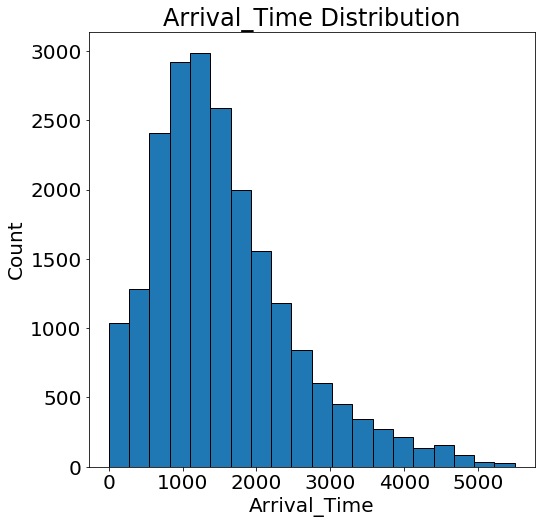

In [0]:
figsize(8, 8)
plt.hist(df['Time_from_Pickup_to_Arrival'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Arrival_Time'); 
plt.ylabel('Count'); plt.title('Arrival_Time Distribution');

In [0]:
types = df.dropna(subset=['Time_from_Pickup_to_Arrival'])
types = types['Personal or Business'].value_counts()
types = list(types[types.values > 100].index)

In [0]:
# Find all correlations and sort 
correlations_data = df.corr()['Time_from_Pickup_to_Arrival'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Destination Lat                             -0.067739
Pickup Lat                                  -0.055063
Placement - Day of Month                    -0.015663
Confirmation - Day of Month                 -0.015654
Arrival at Pickup - Day of Month            -0.015654
Pickup_Day_of_Month                         -0.015654
Arrival at Destination - Day of Month       -0.015654
Personal or Business                        -0.015625
Platform Type                               -0.006502
Temperature                                  0.005180
Placement - Weekday (Mo = 1)                 0.012196
Pickup - Weekday (Mo = 1)                    0.012251
Arrival at Pickup - Weekday (Mo = 1)         0.012251
Confirmation_Weekday_Mo1                     0.012251
Arrival at Destination - Weekday (Mo = 1)    0.012251
Name: Time_from_Pickup_to_Arrival, dtype: float64 

Arrival at Pickup - Day of Month            -0.015654
Pickup_Day_of_Month                         -0.015654
Arrival at Destination - Day o

In [0]:
numeric_subset = df.select_dtypes('number')

# Select the categorical columns
categorical_subset = df[['Rider Id', 'Personal or Business']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['Time_from_Pickup_to_Arrival'])

# Find correlations with the score 
correlations = features.corr()['Time_from_Pickup_to_Arrival'].dropna().sort_values()

In [0]:
figsize(12, 10)

# Extract the building types
features['Personal or Business'] = df.dropna(subset = ['Time_from_Pickup_to_Arrival'])['Personal or Business']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Personal or Business'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Distance_KM', 'Time_from_Pickup_to_Arrival', 
          hue = 'Personal or Business', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = True,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Distance km", size = 28)
plt.ylabel('Arrival Time', size = 28)
plt.title('Distance vs Arrival time', size = 36);

In [0]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Time_from_Pickup_to_Arrival']
    x = x.drop(columns = ['Time_from_Pickup_to_Arrival'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Pickup Lat', 'Pickup Long','Arrival at Destination - Weekday (Mo = 1)', 'Vehicle Type', 
                          'Arrival at Destination - Day of Month', 'Destination Lat', 'Destination Long'])
    
    # Add the score back in to the data
    x['Time_from_Pickup_to_Arrival'] = y
               
    return x

In [0]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

In [0]:
features['Time_from_Pickup_to_Arrival'].isna().sum()

In [0]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['Time_from_Pickup_to_Arrival'].isna()]
score = features[features['Time_from_Pickup_to_Arrival'].notnull()]

print(no_score.shape)
print(score.shape)

In [0]:
features = score.drop(columns='Time_from_Pickup_to_Arrival')
targets = pd.DataFrame(score['Time_from_Pickup_to_Arrival'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

In [0]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [0]:
df1 = df.drop(['Pickup Lat', 'Pickup Long','Arrival at Destination - Weekday (Mo = 1)', 'Vehicle Type', 'Arrival at Destination - Day of Month', 'Destination Lat', 'Destination Long'], axis='columns')
df1.columns

In [0]:
from seaborn import pairplot
g = pairplot(df1.drop('Time_from_Pickup_to_Arrival', axis='columns'))
g.fig.set_size_inches(15,15)

In [0]:
X = df1[['Distance_KM', 'Temperature', 'Pickup_Day_of_Month', 
             'Confirmation_Weekday_Mo1', 'Platform Type']].values
y = df1['Time_from_Pickup_to_Arrival'].values

In [0]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df1['Time_from_Pickup_to_Arrival'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X_train = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

In [0]:
from sklearn.impute import SimpleImputer
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

# Train on the training features
imputer.fit(X)

# Transform both training data and testing data
X = imputer.transform(X_train)
X_test = imputer.transform(X_test)
print (X_test)
print (X)

In [0]:
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

In [0]:
regressor.fit(X_train, y_train, sample_weight=None)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = round(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}),1)
df.head(25)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [0]:
plt.scatter(X_test[:,0], y_test,  color='gray',
    linewidths=0.5,
    verts=None,
    edgecolors='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
print (explained_variance_score(y_test, y_pred))